# SUPERMARKET DATA : PREDICT RATING

**Context**
<br>The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.</br>

<br> Datasets can be access at: https://www.kaggle.com/mahmoudeletrby/supermarket </br>

Columns in this dataset are:

<table>
<thead>
<tr><th>Columns</th><th>Description</th></tr>
</thead>
<tbody>
<tr><td>Invoice id</td><td>Computer generated sales slip invoice identification number</td></tr>
<tr><td>Branch</td><td>Branch of supercenter (3 branches are available identified by A, B and C).</td></tr>
<tr><td>City</td><td>Location of supercenters</td></tr>
<tr><td>Customer type</td><td>Type of customers, recorded by Members for customers using member card and Normal for without member card.</td></tr>
<tr><td>Gender</td><td>Gender type of customer</td></tr>
<tr><td>type</td><td>General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel</td></tr>
<tr><td>Unit_price</td><td>Price of each product in dollar </td></tr>
<tr><td>Date</td><td>Date of purchase (Record available from January 2019 to March 2019)</td></tr>
<tr><td>Time</td><td>Purchase time (10am to 9pm)</td></tr>
<tr><td>Payment</td><td>Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)</td></tr>
<tr><td>Cost</td><td>Cost of goods sold</td></tr>
<tr><td>Gross income</td><td>Gross income</td></tr>
<tr><td>Rating</td><td>Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)</td></tr>
</tbody>
</table>

In [234]:
import pandas as pd
from pandas import ExcelWriter #to read excel file
from pandas import ExcelFile
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
df = pd.read_excel('/Users/raveltowangistu/Desktop/Iykra/Week 4/Machine Learning/supermarket.xls')

## Data Understanding

Before analyze data, we need to understand about the data first. We will use **df.head( ) , df.shape, df.describe( ), and df.isnull.sum( ) to understand data**. Also, we will check data per column to know if there is any poor data inside the columns.

In [236]:
df.shape

(1000, 14)

In [237]:
df.head(2)

,invoiceID,branch,city,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,gross income,rating
0,101-17-6199,A,Cairo,Normal,Male,Food and beverages,45.79,7,2019-03-13,19:44:00,Credit card,320.53,16.0265,7.0
1,101-81-4070,C,Alexandria,Member,Female,Health and beauty,62.82,2,2019-01-17,12:36:00,eWallet,125.64,6.2820,4.9


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
invoiceID       1000 non-null object
branch          1000 non-null object
city            1000 non-null object
cust_type       1000 non-null object
gender          1000 non-null object
type            1000 non-null object
unit_price      1000 non-null float64
quantity        1000 non-null int64
date            1000 non-null datetime64[ns]
time            1000 non-null object
payment         1000 non-null object
cost            1000 non-null float64
gross income    1000 non-null float64
rating          1000 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(8)
memory usage: 109.5+ KB


In [239]:
df.isnull().sum()

invoiceID       0
branch          0
city            0
cust_type       0
gender          0
type            0
unit_price      0
quantity        0
date            0
time            0
payment         0
cost            0
gross income    0
rating          0
dtype: int64

In [240]:
df.describe()

,unit_price,quantity,cost,gross income,rating
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,307.58738,15.379369,6.97270
std,26.494628,2.923431,234.17651,11.708825,1.71858
min,10.080000,1.000000,10.17000,0.508500,4.00000
25%,32.875000,3.000000,118.49750,5.924875,5.50000
50%,55.230000,5.000000,241.76000,12.088000,7.00000
75%,77.935000,8.000000,448.90500,22.445250,8.50000
max,99.960000,10.000000,993.00000,49.650000,10.00000


Based on data that we found, we can know that there is **1000 row and 14 column** in datasets. Also, there is no null data inside here. Actually most of the data are really good and doesn't need alot of cleaning processing.

## Data Cleaning

Since most of the data are categorical, in order to do **regression**, we need to use dummies to make it acceptable to use in data. For dummies with binominal, we can use directly dummies in the variable. 

In [241]:
#Create dummies for customer type and gender.
df['cust_type'] = pd.get_dummies(df['cust_type'])
df['gender'] = pd.get_dummies(df['gender'])

In [242]:
df.head(5)

,invoiceID,branch,city,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,gross income,rating
0,101-17-6199,A,Cairo,0,0,Food and beverages,45.79,7,2019-03-13,19:44:00,Credit card,320.53,16.0265,7.0
1,101-81-4070,C,Alexandria,1,1,Health and beauty,62.82,2,2019-01-17,12:36:00,eWallet,125.64,6.2820,4.9
2,102-06-2002,C,Alexandria,1,0,Sports and travel,25.25,5,2019-03-20,17:52:00,Cash,126.25,6.3125,6.1
3,102-77-2261,C,Alexandria,1,0,Health and beauty,65.31,7,2019-03-05,18:02:00,Credit card,457.17,22.8585,4.2
4,105-10-6182,A,Cairo,1,0,Fashion accessories,21.48,2,2019-02-27,12:22:00,eWallet,42.96,2.1480,6.6


But for more than binomial, we need to make new variable and concat the data into the dataframe.

In [243]:
#dummies for variable with trinomial or more (3 categories or more)
branch = pd.get_dummies(df['branch'])
payment = pd.get_dummies(df['payment'])
Type = pd.get_dummies(df['type'])

In [244]:
#combine df2 with all of dummies variable to make it into 1 variabel
df2 = pd.concat((df,branch,payment,Type), axis = 1)
df2.head()

,invoiceID,branch,city,cust_type,gender,type,unit_price,quantity,date,time,...,C,Cash,Credit card,eWallet,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
0,101-17-6199,A,Cairo,0,0,Food and beverages,45.79,7,2019-03-13,19:44:00,...,0,0,1,0,0,0,1,0,0,0
1,101-81-4070,C,Alexandria,1,1,Health and beauty,62.82,2,2019-01-17,12:36:00,...,1,0,0,1,0,0,0,1,0,0
2,102-06-2002,C,Alexandria,1,0,Sports and travel,25.25,5,2019-03-20,17:52:00,...,1,1,0,0,0,0,0,0,0,1
3,102-77-2261,C,Alexandria,1,0,Health and beauty,65.31,7,2019-03-05,18:02:00,...,1,0,1,0,0,0,0,1,0,0
4,105-10-6182,A,Cairo,1,0,Fashion accessories,21.48,2,2019-02-27,12:22:00,...,0,0,0,1,0,1,0,0,0,0


Besides that, we also try to change and extract date and time, so it can be used part of regression. We don't need to extract year because the data only taken from Jan 2019 - March 2019 which all have the same year.

In [245]:
import datetime
#extract day and month
df2['day'] = df2['date'].dt.day
df2['month'] = df2['date'].dt.month

To split time, we will use pd.to_datetime, in order to change it to date time before splitting it into hours.

In [246]:
df2['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

In [247]:
df2.head()

,invoiceID,branch,city,cust_type,gender,type,unit_price,quantity,date,time,...,eWallet,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,day,month,hour
0,101-17-6199,A,Cairo,0,0,Food and beverages,45.79,7,2019-03-13,19:44:00,...,0,0,0,1,0,0,0,13,3,19
1,101-81-4070,C,Alexandria,1,1,Health and beauty,62.82,2,2019-01-17,12:36:00,...,1,0,0,0,1,0,0,17,1,12
2,102-06-2002,C,Alexandria,1,0,Sports and travel,25.25,5,2019-03-20,17:52:00,...,0,0,0,0,0,0,1,20,3,17
3,102-77-2261,C,Alexandria,1,0,Health and beauty,65.31,7,2019-03-05,18:02:00,...,0,0,0,0,1,0,0,5,3,18
4,105-10-6182,A,Cairo,1,0,Fashion accessories,21.48,2,2019-02-27,12:22:00,...,1,0,1,0,0,0,0,27,2,12


## Data Visualization

To help us, understand more about the data we will try to visualize some univariate and multivariate data

### Univariate Variabel

Text(0.5, 1.0, 'Cairo has the highest visitors')

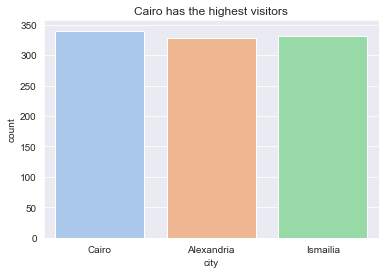

In [248]:
sns.set_style('darkgrid')
sns.set_palette('pastel')
sns.countplot('city',data=df2)
plt.title('Cairo has the highest visitors')

Based on graph, we can know that Cairo has the highest supermarket visitors.

Text(0.5, 1.0, 'Number between Male and Female Customer are similar')

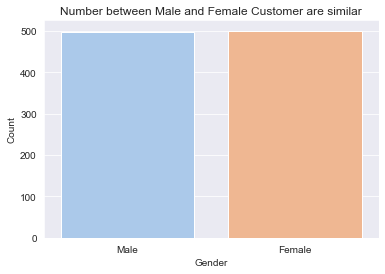

In [249]:
ax = plt.subplot()
sns.countplot('gender',data=df2)
ax.set_xticks([0,1])
ax.set_xticklabels(['Male','Female'])
ax.set(xlabel="Gender", ylabel = "Count")
plt.title('Number between Male and Female Customer are similar')

Text(0.5, 1.0, 'January, March, February Has The Highest Transaction Consecutively')

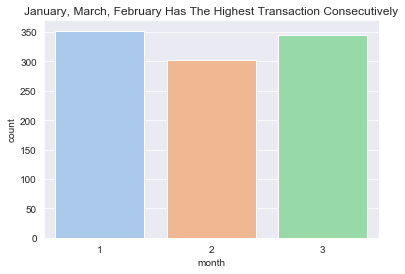

In [250]:
sns.countplot('month',data=df2)
plt.title('January, March, February Has The Highest Transaction Consecutively')

January, March, February has the highest transaction consecutively.

Text(0.5, 1.0, '19 or 7 pm are time with the highest visitors')

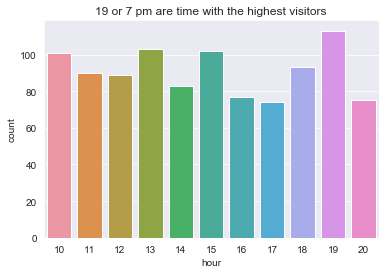

In [251]:
sns.countplot('hour',data=df2)
plt.title('19 or 7 pm are time with the highest visitors')

Highest transaction happens on 19.00 or 7 pm.

Text(0.5, 1.0, 'Fashion and F&B are the leading sales in Supermarket')

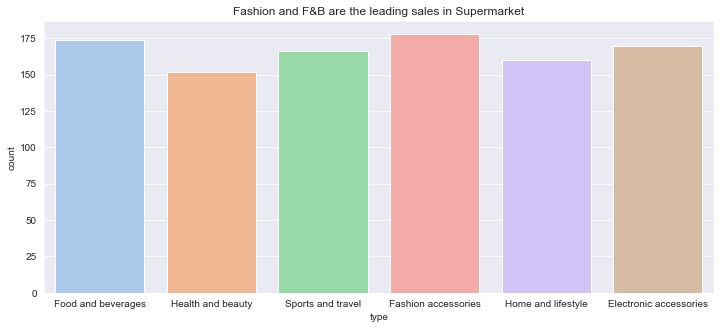

In [252]:
plt.figure(figsize=(12,5))
sns.countplot('type',data=df)
plt.title('Fashion and F&B are the leading sales in Supermarket')

1st and 2nd Highest transaction are on **Fashion Accessories** and **Food and beverages**.

/Users/raveltowangistu/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:323: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  ax.plot(x, y, color=color, label=label, **kwargs)


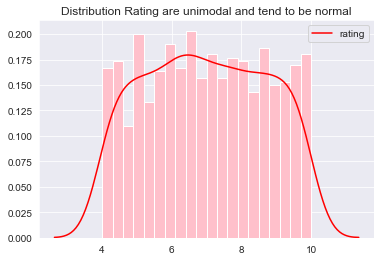

In [253]:
sns.kdeplot(df2['rating'],c='red')
plt.hist(df2['rating'],density = True,bins=20, color ='pink')
plt.title('Distribution Rating are unimodal and tend to be normal')
plt.show()

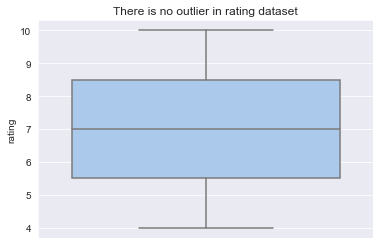

In [254]:
sns.boxplot(y='rating',data=df)
plt.title('There is no outlier in rating dataset')
plt.show()

The distribution of **ratings** in supermarket data are unimodal and reach their mode on around 0.6. Also,there is no outlier in data.

### Multivariate Analysis

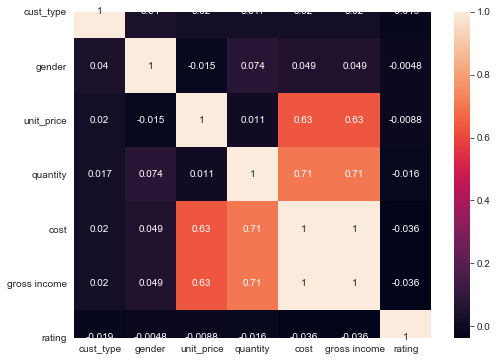

In [255]:
cor = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor, vmax=1, annot=True)
plt.show()

Text(0.5, 1.0, 'Relationship between Cost and Quantity')

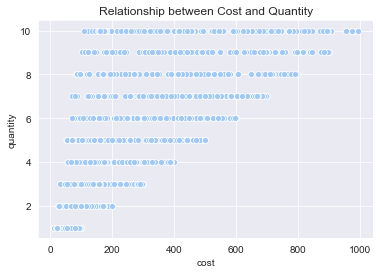

In [256]:
sns.scatterplot(data=df2,x='cost',y='quantity')
plt.title('Relationship between Cost and Quantity')

Based on correlation analysis, we can know and predict that cost, gross income, and quantity has strong correlation between them. It means that we cannot put all of three variables into one multilinear regression because of law **multicolinearity**.

Text(0.5, 1.0, 'Relationship between Hour and Rating')

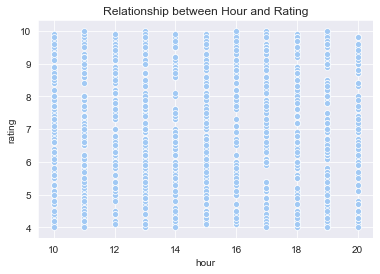

In [257]:
sns.scatterplot(data=df2,x='hour',y='rating')
plt.title('Relationship between Hour and Rating')

Text(0.5, 1.0, 'Relationship between Gross Income and Rating')

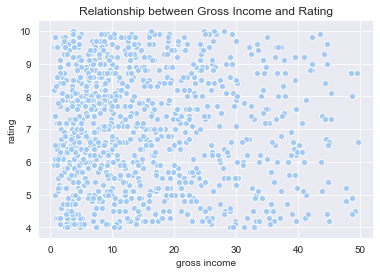

In [258]:
sns.scatterplot(data=df2,x='gross income',y='rating')
plt.title('Relationship between Gross Income and Rating')

Based on comparing gross income and hour on rating, the data shows that there are high probability that there is no correlation between the two variables.

## Modelling

To predict rating, we will try to use two methodology: **Multi Regression** and **KNNRegressor**. We will try to compare the quality and effect size of both methodologies.

### MultiRegression

Divide Table into variabel X(features beside Rating) and Y(Rating)

In [259]:
X = df2[['cust_type','gender','gross income','A','B','C','Cash','Credit card','eWallet','Electronic accessories','Fashion accessories','Food and beverages','Health and beauty','Home and lifestyle','Sports and travel','day','month','hour']]
y = df2['rating']

Divide the data into train and test data.

In [260]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

Use Regressor to know the slope of data.

In [261]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_prediction = regressor.predict(X_test)
#calculate total coefficient of regressor
regressor.score(X_test,y_test)

-0.05983037889970455

In [279]:
#To know the coefficient of every feature slope
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
cust_type,-0.028405
gender,0.025536
gross income,-0.006082
A,0.085897
B,-0.191426
C,0.105529
Cash,0.007883
Credit card,0.015136
eWallet,-0.023019
Electronic accessories,-0.056381


Based on coefficient of correlation in each feature, we can know that the correlation are really small (mostly below 0.1), which means every feature has a poor correlation with ratings variable.

### KNNRegressor( ) 

To use KNNRegressor( ), we will use **sklearn.neighbors, and metrics of mean_squared_error**

In [263]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
%matplotlib inline

In [264]:
X2 = df2[['cust_type','gender','gross income','A','B','C','Cash','Credit card','eWallet','Electronic accessories','Fashion accessories','Food and beverages','Health and beauty','Home and lifestyle','Sports and travel','day','month','hour']]
y2 = df2['rating']

In [265]:
#train and test data
X2_train, X2_test, y2_train, y2_test = train_test_split(X,y, test_size = 0.2, random_state=0)

**KNNRegressor( )** need to be standardize because every feature that we use on the variable has different scales. Standarized make sure the scales become same again.

In [266]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X2_train)
X2_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X2_test)
X2_test = pd.DataFrame(x_test_scaled)

Find the Best K value for KNNregressor(), by compare K value with their RMSE:

In [267]:
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X2_train, y2_train)  #fit the model
    pred=model.predict(X2_test) #make prediction on test set
    error = sqrt(mean_squared_error(y2_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 2.4215181188667576
RMSE value for k=  2 is: 2.1673255408452143
RMSE value for k=  3 is: 2.0578994144515423
RMSE value for k=  4 is: 1.9868686104018052
RMSE value for k=  5 is: 1.9502117833712318
RMSE value for k=  6 is: 1.9360806629201517
RMSE value for k=  7 is: 1.8924689628921803
RMSE value for k=  8 is: 1.864014275361109
RMSE value for k=  9 is: 1.8242728976055835
RMSE value for k=  10 is: 1.8177502578737268


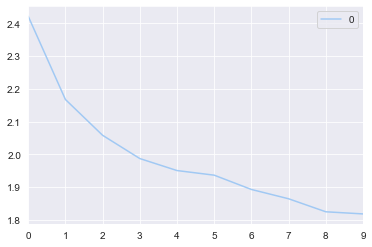

In [268]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

Based on the data shown above, we can use n-neighbors = 9, because after 9, k-neighbors number tend to be constant.

In [269]:
reg = KNeighborsRegressor(n_neighbors=9)
reg.fit(X2_train, y2_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='uniform')

## Evaluation

Evaluate both of methodologies and machine learning

### MultiRegression

Find Y predicted and compate Y (predict) with Y (actual) score.

In [270]:
y_pred = regressor.predict(X_test)

Create table where we can compare actual from Y_test and Y_predicted score based on our regression.

In [271]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3.head(10)

,Actual,Predicted
993,6.5,6.797570
859,7.2,6.870647
298,7.6,7.043751
553,4.3,6.994484
672,8.5,7.043249
971,5.1,7.163521
27,4.0,7.174578
231,6.9,6.788973
306,4.3,6.765513
706,4.5,6.781582


Calculate **Mean Absolute Error,Mean Squared Error, Root Mean Squared Error, and Rsquared** based on the data.

In [272]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared:', r2_score(y_test,y_pred,multioutput='variance_weighted'))

Mean Absolute Error: 1.516806228203846
Mean Squared Error: 3.117067127381921
Root Mean Squared Error: 1.765521771993175
R squared: -0.05983037889970455


Indicator of good **MAE and RMSE** when around 10% of total mean dependent variable in data.

In [273]:
mae_ml = metrics.mean_absolute_error(y_test, y_pred)
rmes_ml = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mean = df2['rating'].mean()
a = mae_ml/mean *100
b = rmes_ml/mean * 100

print('The percentage of MAE and Mean are', a,'%')
print('The percentage of RMES and Mean are', b,'%')
print('R squared:', r2_score(y_test,y_pred,multioutput='variance_weighted'))

The percentage of MAE and Mean are 21.753499049203995 %
The percentage of RMES and Mean are 25.32048950898757 %
R squared: -0.05983037889970455


Based on the dataset, we can know that machine learning of Multi Linear Regression **has poor relationship between features that we use and rating variables**. The percentage of **MAE and RMES to mean are more than 10%**, which means that the accuracy of this regression is really poor. Also, the **r squared, or effect size of this relations are below than 0**, which means to create linear regression, they need to force your regression to move to specific point and totally need to be considered for machine learning purpose.

### KNNRegressor(  ) 

The step are totally simmilar with evalute **multiregression linear**

In [274]:
y2_pred = reg.predict(X2_test)

In [275]:
reg.score(X2_test, y2_test)

-0.13153976571292092

In [276]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))
print('R squared:', r2_score(y2_test,y2_pred,multioutput='variance_weighted'))

Mean Absolute Error: 1.5382222222222222
Mean Squared Error: 3.3279716049382717
Root Mean Squared Error: 1.8242728976055835
R squared: -0.13153976571292092


Indicator of good **MAE and RMSE** when around 10% of total mean dependent variable in data.

In [277]:
mae_knn = metrics.mean_absolute_error(y2_test, y2_pred)
rmes_knn = np.sqrt(metrics.mean_squared_error(y2_test, y2_pred))
mean = df2['rating'].mean()
a = mae_knn/mean *100
b = rmes_knn/mean * 100

print('The percentage of MAE and Mean are', a,'%')
print('The percentage of RMES and Mean are', b,'%')
print('R squared:', r2_score(y2_test,y2_pred,multioutput='variance_weighted'))

The percentage of MAE and Mean are 22.060639669313513 %
The percentage of RMES and Mean are 26.16307739621072 %
R squared: -0.13153976571292092


Similar with Multi Linear Regression, Machine Learning in KNN-Regression are really poor since the percentage of **MAE and RMES to mean are more than 10% and r square is below than 0**. But, based on comparing scores evaluation between KNN and Multi Linear Regression, **KNN is much better than Multi Linear** although both of them perform really poor.

# Conclusion

Based on Modelling and Evaluation, we can see that **score MAE and RMES** in Multi Linear or KNN-Regression **are more than 10%**. It means that the machine learning is **bad on accuracy**. On the other side, both machine learning has score **R squared below 0**, which means that the **data are really poor and cannot explain the relationship between features and ratings**.

Several Reasons why our Machine Learning are really poor:
1. Need more data: We need to have a huge amount of data to get the best possible prediction.
2. Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.
3. Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.